# 6. 딥러닝![fashion mnist index.png](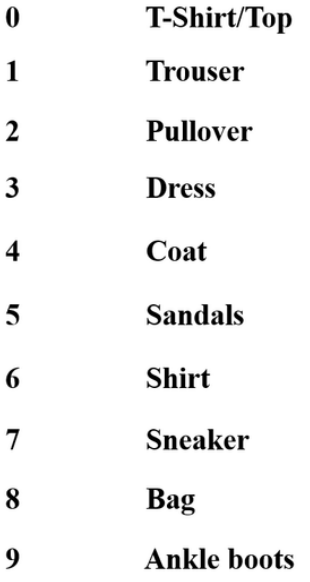![labels_table.png](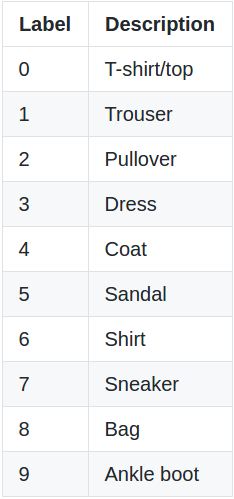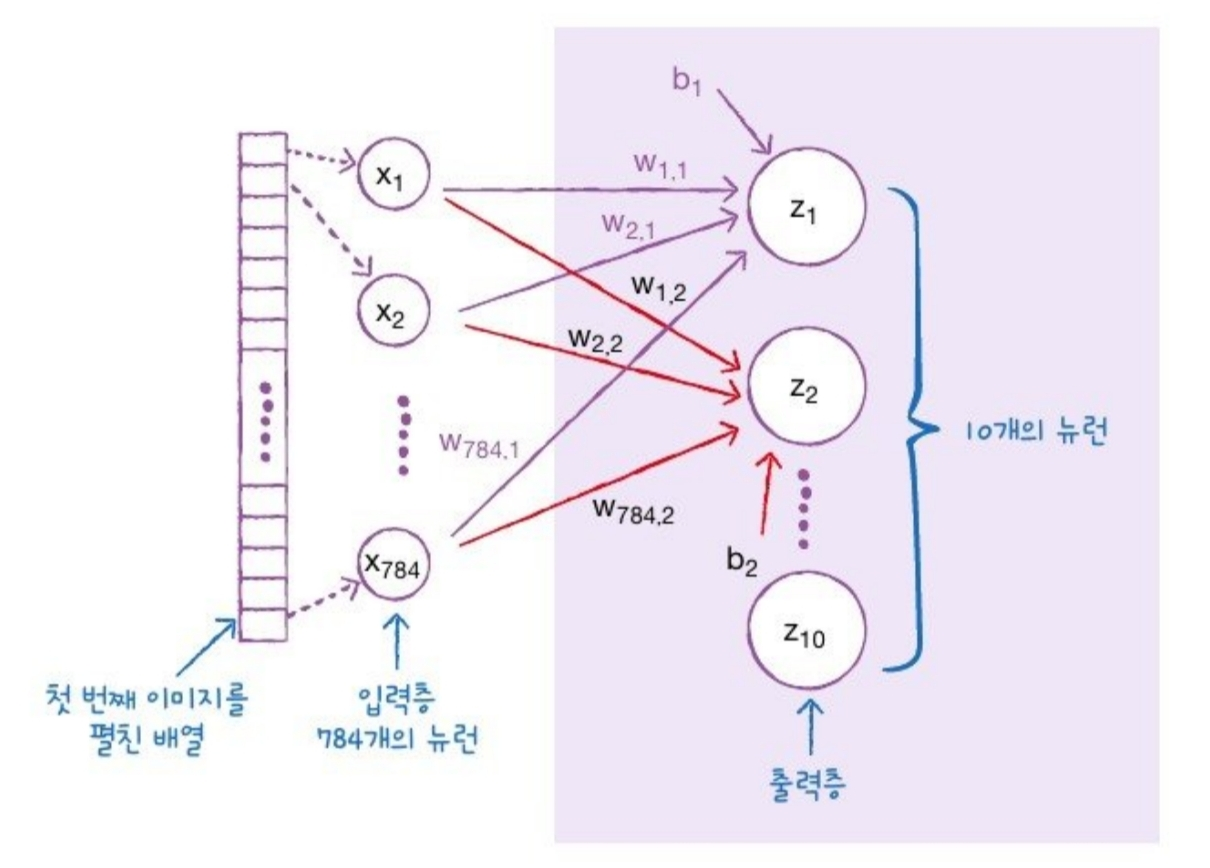))

### 6-1 인공 신경망

### 1) 패션 MNIST

이번에는, **텐서플로**를 사용해보려한다.

머신러닝의 경우 붓꽃 데이터셋이, 딥러닝의 경우에는 MNIST 데이터셋이 유명하다.

이**MNIST** 데이터셋은 0부터 9까지의 숫자로 이루어져있다. MNIST와 크기, 개수가 동일하지만 숫자 대신 패션 아이템으로 이루어진 데이터가 **패션 MNIST**이다.

In [2]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) =\
  keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


`keras.datasets.fashion_mnist` 모듈 아래, `load_data()` 함수는 훈련 데이터와 테스트 데이터를 나누어 반환한다.

이 데이터는 입력과 타깃의 쌍으로 구성되어있다.

In [3]:
print(train_input.shape, train_target.shape)
# 훈련 세트의 크기 확인

(60000, 28, 28) (60000,)


- 훈련데이터는 총 60000개의 이미지로 구성되어 있으며, 각 이미지는 28 x 28 크기이다.
- 타깃데이터 또한 60000개의 원소가 있는 1차원 배열이다.

In [4]:
print(test_input.shape, test_target.shape)
# 테스트 세트의 크기 확인

(10000, 28, 28) (10000,)


- 테스트데이터는 10000개의 이미지로 이루어져있다.

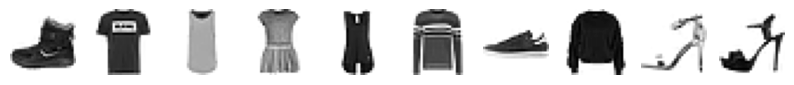

In [5]:
# 훈련 데이터의 몇 개의 샘플을 그림으로 출력.

import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 10, figsize = (10,10))
for i in range(10):
  axs[i].imshow(train_input[i], cmap = 'gray_r')
  axs[i].axis('off')
plt.show()

크기가 28x28이다 보니, 사진의 크기가 작고 흐릿하다.

In [6]:
# 파이썬의 리스트 내포를 사용해 처음 10개 샘플의 타깃값을 리스트로 만든 후, 출력해보려한다.
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


패션 MNIST의 타깃은 0~9까지의 숫자 레이블로 구성된다.

패션 MNIST에 포함된 10개 레이블의 의미는 다음과 같다.

- 0 : 티셔츠
- 1 : 바지
- 2 : 스웨터
- 3 : 드레스
- 4 : 코트
- 5 : 샌달
- 6 : 셔츠
- 7 : 스니커즈
- 8 : 가방
- 9 : 앵클부츠


In [7]:
# 넘파이를 import해, unique()함수로 레이블 당 샘플의 개수 확인
import numpy as np
print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


0~9까지 모두 6000개의 샘플이 들어 있는 것을 확인할 수 있다.

### 2) 로지스틱 회귀로 패션 아이템 분류하기

이 훈련 샘플은 총 60000개나 되기 때문에, 전체 데이터를 한꺼번에 사용해 모델을 훈련하는 것 보다, 하나씩 꺼내 모델을 훈련하는 방법이 더 효율적으로 보인다.

이럴 때 쓰는 것이 바로 **확률적 경사 하강법**이다.

패션 MNIST의 경우, 각 픽셀은 0~255 사이의 정숫값을 가진다.

이런 이미지의 경우, **각 값을 255로 나누어 0~1 사이의 값으로 정규화**한다. 이는 표준화는 아니지만 양수값으로 이루어진 이미지를 전처리 할 때 널리 사용하는 방법이다.

SGDClassifier는 2차원 입력을 다루지 못하므로, 각 샘플을 1차원 배열로 만들어야한다.

In [8]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)


`reshape()` 메소드의 두 번째 매개변수를 28 x 28 이미지 크기에 맞게 지정하면, 첫 번째 차원(샘플 개수)는 변하지 않고 원본 데이터의 두 번째, 세 번째 차원이 1차원으로 합쳐진다.

In [9]:
print(train_scaled.shape)

(60000, 784)


In [10]:
# SGDClassifier와 cross_validate 함수를 통해 교차 검증으로 성능 확인

from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log', max_iter = 5, random_state = 42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8196000000000001


여기에서는 에포크 횟수를, 즉 반복 횟수를(`max_iter`) 값을 5번으로 지정하였다.

반복 횟수를 늘려도 성능이 크게 향상되지는 않는다.

In [11]:

# max_iter = 9
sc = SGDClassifier(loss='log', max_iter = 9, random_state = 42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8303666666666667


In [12]:
# max_iter = 20
sc = SGDClassifier(loss='log', max_iter = 20, random_state = 42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8436666666666666


`max_iter`의 값을 늘렸음에도 불구하고 눈에 띄는 변화가 없는 것을 보아, 다른 방법을 찾아봐야한다.

패션MNIST에 로지스틱 회귀 공식을 적용해보면 다음과 같다.


> z_티셔츠 = w1 x (픽셀1) + w2 x (픽셀2) ... + b

총 784개의 픽셀, 즉 특성이 있으므로 아주 긴 식이 만들어진다.


단 이때, 티셔츠를 계산하기 위해 픽셀 784개와 곱하는 가중치와 절편은, 바지를 계산하기 위해 픽셀 784개와 곱하는 가중치와 절편값과 다르다.



### 3) 인공 신경망

사실, 이전 우리는 인공 신경망을 이미 만들었다.

가장 기본적인 인공 신경망은 **확률적 경사 하강법을 사용하는 로지스틱 회귀**와 같다.

- 인공 신경망에서는 z 값을 계산하는 단위를 **뉴런**이라고 한다. 단, 뉴런에서 일어나는 일은 선형 계산이 전부이므로, 요즘은 **유닛**이라는 표현을 쓰는 사람이 많아지고 있다.

- 픽셀1, 픽셀2를 x1, x2..라고 해보자. 이 x1~x784까지를 **입력층**이라고 부른다.

- 이러한 인공 신경망을 **매컬러-피츠 뉴런**이라고도 한다.

In [13]:
from tensorflow import keras

### 4) 인공 신경망으로 모델 만들기

인공 신경망에서는 교차 검증을 잘 사용하지 않고, 검증 세트를 별도로 덜어내어 사용한다.

- 딥러닝 분야의 데이터셋은 충분히 크기 때문에 검증 점수가 안정적이며
- 교차 검증을 수행하기에는 훈련 시간이 너무 오래걸리기
때문이다.

In [14]:
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(
      train_scaled, train_target, test_size = 0.2, random_state = 42)
# 훈련 세트에서 20%를 검증 세트로 덜어냄.

In [15]:
print(train_scaled.shape, train_target.shape)

(48000, 784) (48000,)


In [16]:
print(val_scaled.shape, val_target.shape)

(12000, 784) (12000,)


60000개 중 12000개가 검증 세트로 분리되었다.

우선 훈련 세트로 모델을 만들고, 그 다음 검증 세트로 훈련한 모델을 평가해보려한다.

우선, 인공 신경망 그림의 오른쪽에 놓인 층을 만들어 보려 한다.

이 층은 다음 그림 처럼 10개의 패션 아이템을 분류하기 위해, 10개의 뉴런으로 구성된다.

케라스의 레이어 (`keras.layers`) 패키지 안에는 다양한 층이 준비되어 있는데, 가장 기본이 되는 층은 **밀집층**이다.

왼쪽의 784개의 픽셀과 오른쪽 10개의 뉴런이 모두 연결된 선을 상상해 보면 왜 이름이 밀집층인지 알 수 있다.

이런 층을 양쪽의 뉴런이 모두 연결하고 있기 때문에 **완전 연결층**이라고도 부른다.

(사진 첨부가 안되어서, 교재 353p 참고할 것.)

In [17]:
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))

- 첫 번째 매개변수 : 뉴런 개수를 10개로 지정한다.
- 두 번째 매개변수 : 10개의 뉴런에서 출력되는 값을 확률로 바꾸기 위해 소프트맥스 함수를 사용한다.
- 세 번째 매개변수 : 10개의 뉴런이 각각 몇 개의 입력을 받는지 튜플로 정한다.

여기서는 784개의 픽셀값을 가지도록 하였다.

In [18]:
model = keras.Sequential(dense)
# 여기서 dense 객체가 바로 신경망 모델이다.

소프트 맥스 함수와 같이 뉴런의 선형 방정식 계산 결과에 적용되는 함수를 **활성화 함수**라고 한다.

### 5) 인공 신경망으로 패션 아이템 분류하기

In [19]:
model.compile(loss='sparse_categorical_crossentropy', metrics = 'accuracy')

케라스 모델을 훈련하기 전, model 객체의 `compile()` 메소드를 통해 모델 설정 단계를 거쳐야한다.

이때, **손실 함수의 종류**를 지정해주어야한다.

다중 분류에서는 **크로스 엔트로피 손실 함수**를 사용하는 데, 케라스에서는 이를 `loss='categorical_crossentropy'` 라는 표현을 통해 부른다.


그렇다면 `sparse` 라는 표현은 왜 쓰인 것인가?

다중 분류일 경우, 이진 분류와 달리 각 클래스에 대한 확률이 모두 출력되기 때문에, 타깃에 해당하는 확률만 남겨 놓기 위해 나머지 확률에는 모두 0을 곱해야한다.

즉, 넘파이 브로드캐스팅을 통해 배열에서 동일한 위치의 원소끼리 곱셈을 해야한다.

결국 신경망은 티셔츠 샘플에서 손실을 낮추려면 첫 번째 뉴런의 활성화 출력 a1의 값을 가능한 1에 가깝게 만들어야한다.

이것이 바로 크로스 엔트로피 손실 함수가 신경망에 원하는 바라고 보면 된다.

이와 같은 과정을 **원-핫 인코딩**이라고 한다.

In [20]:
print(train_target[:10])

[7 3 5 8 6 9 3 3 9 9]


패션 MNIST의 데이터 타깃값은 모두 정수이다.

텐서플로에서는 정수로 된 타깃값을 원-핫 인코딩으로 바꾸지 않고도 그냥 사용할 수 있다.

이 때 쓰는 것이 바로 `'sparse_categorical_crossentropy'`이다.

빽빽한 배열 말고 정숫값 하나만 사용한다는 의미로 `sparse`라는 이름을 붙였다고 보면 된다.

다음으로, `compile()` 함수의 두 번째 매개변수인 **metrics**에 대해 알아보려 한다.

케라스는 모델이 훈련할 때마다 기본으로 에포크마다 손실 값을 출력하는데, 이때 정확도를 함께 출력하면 더 좋을 것이다.

그래서 `metrics` 매개변수에 정확도 지표를 의미하는 `'accuracy'`를 지정했다.

In [21]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6053 - accuracy: 0.7939
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4729 - accuracy: 0.8393
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4500 - accuracy: 0.8473
Epoch 4/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4366 - accuracy: 0.8529
Epoch 5/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4299 - accuracy: 0.8549


이번엔 검증세트 (val_scaled, val_target)에서 모델의 성능을 확인해보려한다.

케라스에서 모델의 성능을 확인하는 함수는 `evaluate()`이다.

In [22]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.4392 - accuracy: 0.8503


[0.43919888138771057, 0.8503333330154419]

검증세트의 점수는 훈련세트의 점수보다 조금 낮은 것이 일반적이다.

## 6-2 심층 신경망
인공 신경망에 층을 여러 개 추가해 패션 MNIST 데이터셋을 분류하며 케라스로 심층 신경망을 만든다.

### 1) 2개의 층

In [33]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) =\
  keras.datasets.fashion_mnist.load_data()

In [34]:
from sklearn.model_selection import train_test_split

train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

이제, 인공 신경망 모델에 층을 2개 추가해보려 한다.

처음 만든 신경망 모델과 다른 점은 입력층과 출력층 사이에 밀집층이 추가된 것이다.

이렇게 입력층과 출력층 사이의 모든 층을 **은닉층**이라고 한다.

은닉층에 활성화 함수를 적용하는 이유는 다음과 같다.

은닉층에서 선형적인 산술 계산만 수행한다면, 사실상 수행 역할이 없는 셈이다.

선형 계산을 적당하게 비선형적으로 비틀어주어야 다음 층의 계산과 단순히 합쳐지지 않고 나름의 역할을 수행할 수 있다.

In [35]:
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))
dense2 = keras.layers.Dense(10, activation='softmax')

하나는 시그모이드를, 하나는 소프트맥스 함수를 사용하는 두 개의 모델을 선언하였다.

### 2) 심층 신경망 만들기

이제 앞에서 만든 dense1과 dense2 객체를 `Sequential` 클래스에 추가해 **심층 신경망**을 만들어보려 한다.

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


케라스는 모델의 `summary()` 메서드를 호출해 층에 대한 유용한 정보를 얻을 수 있다.

층 마다 층 이름과 클래스, 출력 크기, 모델 파라미터 개수가 출력 된다. 이때 `name` 매개변수로 이름을 지정할 수 있다. 층 이름을 따로 지정하지 않으면 케라스가 자동으로 `dense`라고 이름 붙인다.

출력 크기를 보면, `(None, 100)` 인데, 샘플 개수가 아직 정의되어 있지 않기 때문에 None이다.

케라스의 `fit()` 메소드에 훈련 데이터를 주입하면 미니배치 경사 하강법을 사용하는데, 기본 미니 배치 크기는 32개이다.

이 값은 `fit()` 메소드에서 `batch_size` 매개변수로 바꿀 수 있다.

즉, **샘플 개수를 고정하지 않고 어떤 배치 크기에도 유연하게 대응할 수 있도록 NOne으로 설정되어 있는 것`이다.

두 번째 100은, 은닉층의 뉴런 개수를 100으로 두었으니 100개의 출력이 나오는 것이다.

마지막으로, 모델 파라미터의 개수가 출력된다.
출력값을 보아 픽셀 784개와 100개의 모든 조합에 대한 가중치가 있고, 뉴런 마다 1개의 절편이 있음을 확인할 수 있다.

두 번째 층의 출력 크기는 `(None,10)`이다. 위 처럼, 똑같이 해석하면 된다.

샘플 개수와 뉴런 개수, 파라미터 개수.

### 3) 층을 추가하는 다른 방법

In [38]:
model =  keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,),
    name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name = '패션 MNIST 모델')

In [39]:
model.summary()

Model: "패션 MNIST 모델"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2개의 Dense 층이 이전과 동일하게 추가 되었고, 파라미터 개수도 같음을 확인할 수 있다.

바뀐 것은 모델 이름과 층 이름이다.

In [40]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))

다음과 같이 Dense 클래스의 객체를 따로 변수에 담지 않고 바로 `add()` 메소드로 전달할 수 있다.

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               78500     
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5694 - accuracy: 0.8068
Epoch 2/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4118 - accuracy: 0.8518
Epoch 3/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3753 - accuracy: 0.8642
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3533 - accuracy: 0.8726
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3349 - accuracy: 0.8788


추가된 층이 성능을 향상 시켰음을 확인할 수 있다.

이제, 이미지 분류 문제에서 높은 성능을 낼 수 있는 활성화 함수에 대해 알아보려고 한다.

### 4) 렐루 함수

시그모이드 함수는 올바른 출력을 만드는데 신속하게 대응하지 못한다는 단점이 있다. (오른쪽과 왼쪽 긑으로 갈 수록 그래프가 누워있기 때문)

이를 개선하기 위한 다른 종류의 활성화 함수가 바로 **렐루**함수이다.

렐루함수는 입력이 **양수일 경우**에는 마치 활성화 함수가 없는 것처럼 그냥 **입력을 통과** 시키고, **음수일 경우**에는 **0**으로 만든다.

In [44]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape = (28,28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [47]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 100)               78500     
                                                                 
 dense_6 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


`Flatten` 클래스에 포함된 모델 파라미터는 0개이다.

케라스의 Flatten 층을 신경망 모델에 추가하면 입력값의 차원을 짐작할 수 있다는 점이 또 하나의 장점이다.

In [49]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [50]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5343 - accuracy: 0.8093
Epoch 2/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3963 - accuracy: 0.8564
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3568 - accuracy: 0.8703
Epoch 4/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3323 - accuracy: 0.8811
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3185 - accuracy: 0.8855


시그모이드 함수를 사용했을 때와 비교하면, 성능이 조금 향상 되었다.

In [51]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3476 - accuracy: 0.8777


[0.34761348366737366, 0.8777499794960022]

### 5) 옵티마이저

케라스는 다양한 종류의 경사 하강법 알고리즘을 제공하는데, 이들을 **옵티마이저**라고 한다.

In [52]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

우선, SGD 옵티마이저를 사용하려면 `compile()` 메소드의 `optimizer` 매개변수를 `'sgd'` 라 지정한다.

In [53]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics='accuracy')

'sgd' 문자열은 이 클래스의 기본 설정 매개변수로 생성한 객체와 동일하다.

즉 아래의 코드는, 위 코드와 동일하다.

In [54]:
sgd = keras.optimizers.SGD()
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics='accuracy')

만일 SGD 클래스의 학습률 기본값이 0.01일떄 이를 바꾸고 싶다면, 다음과 같이 원하는 학습률을 `learning_rate` 매개변수에 지정한다.


In [55]:
sgd = keras.optimizers.SGD(learning_rate=0.1)

기본 경사 하강법 옵티마이저는 모두 SGD 클래스에서 제공한다.

SGD 클래스의 `momentum` 매개변수 기본값은 0인데, 이를 0보다 큰 값으로 지정하면 마치 이전의 그레이디언트를 가속도처럼 사용하는 **모멘텀 최적화**를 사용한다.

보통, momentum 매개변수는 0.9 이상을 지정한다.


다음처럼 SGD 클래스의 `nesterov` 매개변수를 기본값 False에서 True로 바꾸면, **네스테로프 모멘텀 최적화**를 사용한다.

In [56]:
sgd = keras.optimizers.SGD(momentum=0.9, nesterov=True)

모델이 최적점에 가까이 갈 수록 학습률을 낮출 수 있는데, 이렇게 하면 안정적으로 최적점에 수렴할 가능성이 높아진다.

이런 학습률을 **적응적 학습률**이라고 한다.

In [57]:
adagrad = keras.optimizers.Adagrad()
model.compile(optimizer=adagrad, loss='sparse_categorical_crossentropy', metrics='accuracy')

In [58]:
rmsprop = keras.optimizers.RMSprop()
model.compile(optimizer=rmsprop, loss='sparse_categorical_crossentropy', metrics='accuracy')

위 두 코드는 하나는 Adagrad, 밑은 RMSprop이다.

## 6-3 신경망 모델 훈련

### 1) 손실 곡선

In [59]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [60]:
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

여기서의 if 구문은 `model_fn()` 함수에 케라스 층을 추가하면 은닉층 뒤에 또 하나의 층을 추가하라는 뜻이다.

여기서는 `a_layer` 매개변수로 층을 추가하지 않고 단순하게 `model_fn` 함수를 호출한다.

In [61]:
model = model_fn()

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 100)               78500     
                                                                 
 dense_10 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [62]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

`fit()` 메소드의 결과를 history 변수에 담아보았다.

In [63]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


이 딕셔너리에는 손실과 정확도 값이 포함되어 있음을 확인할 수 있다.

이렇게 history 속성에 포함된 손실과 정확도는 에포크마다 계산한 값이 순서대로 나열된 단순한 리스트이다. 따라서 맷플롯립으로 쉽게 그래프로 그릴 수 있다.

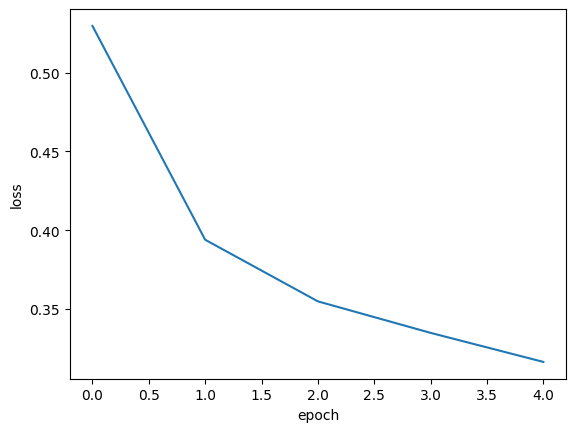

In [64]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
# 손실 값

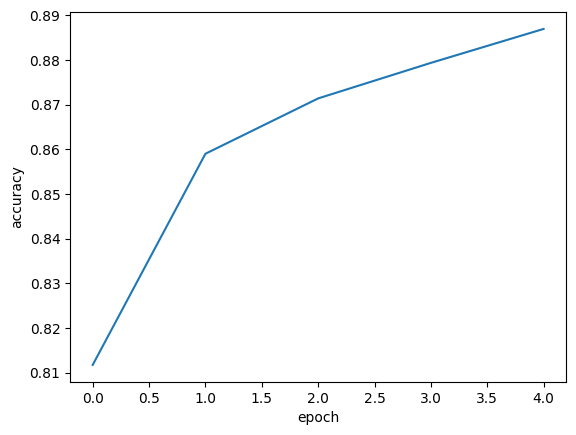

In [65]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()
# 정확도

그래프를 통해 에포크가 증가할 때마다 손실이 감소하고 정확도가 상승함을 확인할 수 있다.

이번에는 에포크 횟수를 20으로 늘려보겠다.

In [66]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

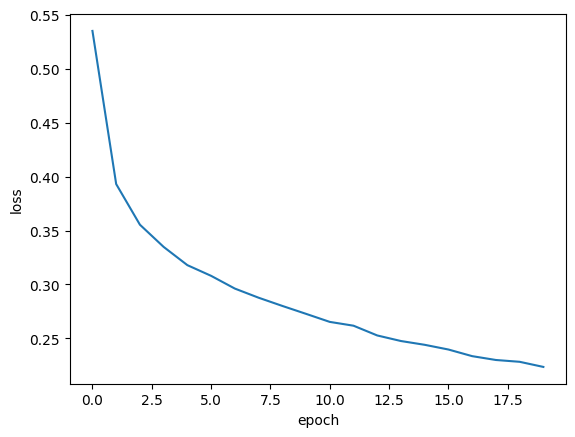

In [68]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
# 에포크 20일 때의 손실

### 2) 검증 손실

에포크에 따른 과대적합과 과소적합을 파악하려면 훈련 세트에 대한 점수뿐만 아니라 검증 세트에 대한 점수도 필요하다.

In [67]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

In [69]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


검증 세트에 대한 손실은 `val_loss`에, 정확도는 `val_accuracy`에 들어있음을 확인할 수 있다.

이제 이 훈련 손실과 검증 손실을 한 그래프에 그려 비교해보려한다.

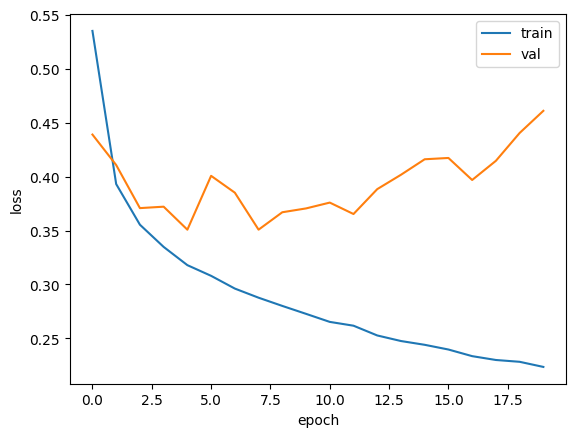

In [70]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()


5번째 에포크에서 검증 손실이 다시 상승함을 확인할 수 있다.

즉, 과대적합한 모델이 만들어진다.

우선은, 옵티마이저 하이퍼파라미터를 조정해 과대적합을 완화시킬 수 있는지 알아보려한다.

In [71]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

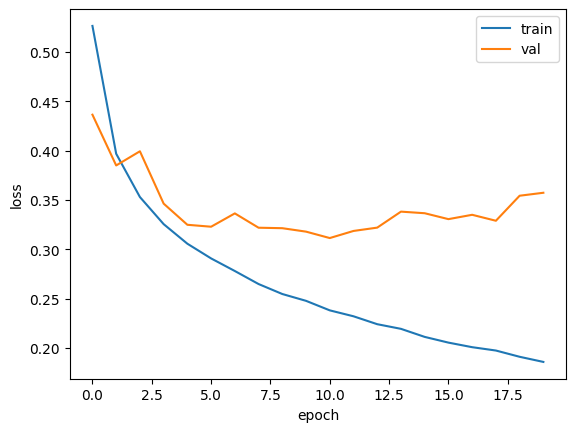

In [72]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

Adam 옵티마이저를 적용하고, 새로 그래프를 그려보니 과대적합이 줄었음을 확인할 수 있다.

즉, Adam 옵티마이저가 이 데이터셋에 잘 맞는다는 것을 보여준다.

### 3) 드롭 아웃

드롭 아웃은 훈련 과정에서 **층에 있는 일부 뉴런을 랜덤하게 꺼서(즉 뉴런의 출력을 0으로 만들어)** 과대적합을 막는다.

이전 층의 일부 뉴런이 랜덤하게 꺼지면 특정 뉴런에 과대하게 의존하는 것을 줄일 수 있고 모든 입력에 주의를 기울여야한다.

일부 뉴런의 출력이 없을 수 있다는 것을 감안하면, 이 신경망은 더 안정적인 예측을 만들 수 있다.

In [73]:
model = model_fn(keras.layers.Dropout(0.3))

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_17 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_18 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [74]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

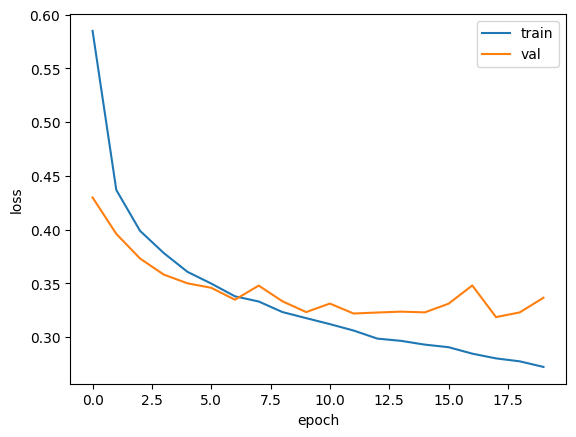

In [76]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

### 4) 모델 저장과 복원

에포크 횟수를 10으로 다시 지정하고 모델을 훈련하려 한다.

In [77]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=10, verbose=0,
                    validation_data=(val_scaled, val_target))

케라스 모델은 훈련된 모델의 파라미터를 저장하는 `save_weights()` 메소드를 제공한다.

In [78]:

model.save_weights('model-weights.h5')

또한 모델 구조와 모델 파라미터를 함께 저장하는 `save()` 메소드도 제공한다.

In [75]:

model.save('model-whole.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [79]:
!ls -al *.h5

-rw-r--r-- 1 root root 333320 Dec  4 15:13 model-weights.h5
-rw-r--r-- 1 root root 981080 Dec  4 15:11 model-whole.h5


두 가지 실험을 해보려한다.

- 첫 번째 : 훈련을 하지 않은 새로운 모델을 만들고 `model_weights.h5` 파일에서 훈련된 모델 파라미터를 읽어서 사용한다.
- 두 번째 : 아예 `model-whole.h5` 파일에서 새로운 모델을 만들어 바로 사용한다.

In [80]:
model = model_fn(keras.layers.Dropout(0.3))

model.load_weights('model-weights.h5')

In [81]:
import numpy as np

val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

375/375 [==============================] - 1s 3ms/step
0.87325


In [82]:
model = keras.models.load_model('model-whole.h5')

model.evaluate(val_scaled, val_target)

375/375 [==============================] - 2s 5ms/step - loss: 0.3365 - accuracy: 0.8827


[0.33649924397468567, 0.8827499747276306]

### 5) 콜백

**콜백**은 훈련 과정 중간에 어떤 작업을 수행할 수 있는 객체로, `keras.callbacks` 패키지 아래에 있는 클래스이다.

In [83]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',
                                                save_best_only=True)

model.fit(train_scaled, train_target, epochs=20, verbose=0,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

In [84]:
model = keras.models.load_model('best-model.h5')

model.evaluate(val_scaled, val_target)

375/375 [==============================] - 3s 7ms/step - loss: 0.3137 - accuracy: 0.8866


[0.3137366473674774, 0.8865833282470703]

ModelCheckpoint 콜백이 가장 낮은 점수의 모델을 자동으로 저장해주었다.

하지만 여전히 20번의 에포크 동안 훈련을 하고 있는데, 사실 검증 점수가 상승하기 시작하면 그 이후에는 과대적합이 더 커지기 때문에 훈련을 계속할 필요가 없다.

이렇게 과대적합이 시작되기 전에 훈련을 미리 중지하는 것을 **조기 종료**라고 한다.

In [85]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

케라스에는 조기 종료를 위한 EarlyStopping 콜백을 제공한다.

In [86]:
print(early_stopping_cb.stopped_epoch)

11


`fit()` 메소드의 `callbacks` 매개변수에 2개의 콜백을 리스트로 전달 한 것을 눈여겨 볼 것.

훈련을 마치고 나면 몇 번째 에포크에서 훈련이 중지 되었는지 `early_stopping_cb` 객체의 `stopped_epoch` 속성에서 확인할 수 있다.

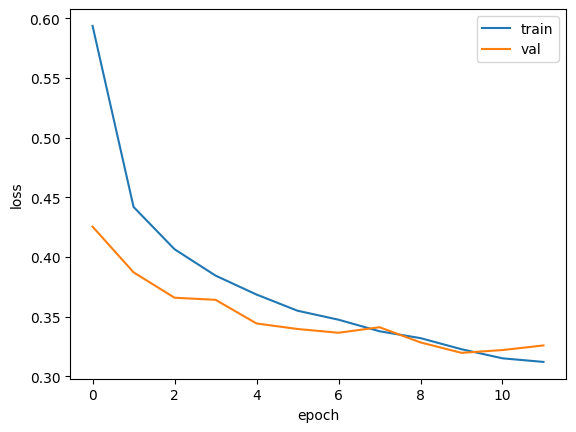

In [87]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [88]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3197 - accuracy: 0.8823


[0.319725900888443, 0.8823333382606506]